# 1. Project Summary

This section will summarize the most important aspects of the project.

* ##### Problem Statement: 
Employee performance has decreased, and the management wants to understand the reasons and find ways to improve it.

* ##### Goals
1. Analyze employee performance by department.
2. Identify the top 3 factors affecting performance.
3. Build a predictive model to forecast employee performance based on input features.
4. Provide recommendations based on insights to improve performance.

# 2. Data Loading and Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the data
df = pd.read_csv("INX_Future_Inc_Employee_Performance.csv")  

In [3]:
df.shape # Inspect amount of the dataset

(1200, 28)

### Basic checks

In [4]:
df.head(3) # Inspect the first few rows of the dataset

EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
0  E1001000   32   Male           Marketing        Single         Sales   
1  E1001006   47   Male           Marketing        Single         Sales   
2  E1001007   40   Male       Life Sciences       Married         Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  

[3 rows x 28 columns]

In [5]:
df.tail(3) # Inspect the last few rows of the dataset

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1197                  3  
1198                  3  
1199                  2  

[3 rows x 28 columns]

In [6]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [7]:
df.info()  # Get an overview of the data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [8]:
df.describe()  # Summary statistics of the numerical features

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [9]:
df.describe(include=['object']) # to take the infor about categorical data columns

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

In [10]:
# Handling missing values
df.isnull().sum()  # Check for missing data

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

* No missing values

# 3. Exploratory Data Analysis (EDA)
* Department-wise Performance Analysis
* Feature Distributions and Correlations

#### Analysis of Department wise Perfomance

In [11]:
# A new pandas Dataframe is created to analyze departmentwise performance as asked.
dept = df.iloc[:,[5,27]].copy()
dept_per = dept.copy()

In [12]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

* Univariate Analysis

In [13]:
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable


In [14]:
# installing sweetviz library

import sweetviz as sv #import sweetviz library
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Insights from Univariant
1. ###### Age (Numerical)
   
Range: 18 to 60 years, with a median age of 36.
Distribution: Slight right skew (skewness = 0.384) indicates that there are slightly more younger employees.
Insight: Age could play a role in performance, attrition, or job satisfaction. We may explore correlations between age and these key factors.


2. ###### Gender (Categorical)
   
Distinct Values: 2 categories (e.g., Male, Female).
Insight: Gender may have an impact on factors like job satisfaction, work-life balance, or attrition rates. We could explore if one gender has a higher attrition rate or performs better in certain departments.

3. ###### Education Background (Categorical)
   
Distinct Values: 6 categories.
Insight: Education levels may influence employee performance and career progression (e.g., higher education could correlate with better performance or higher job levels).


4. ###### Marital Status (Categorical)
Distinct Values: 3 categories (e.g., Single, Married, Divorced).
Insight: Marital status could impact work-life balance or job satisfaction, and therefore, employee performance or attrition.

5. ###### EmpDepartment (Categorical)
Distinct Values: 6 categories.
Insight: Department-wise performance is a key focus of the project. We will explore how performance varies across departments and whether specific departments have higher attrition or satisfaction levels.

6. ###### EmpJobRole (Categorical)
Distinct Values: 19 job roles.
Insight: Different job roles may have varying performance, satisfaction, or attrition levels. Job roles that require more technical expertise may correlate with higher performance or lower job satisfaction.

7. ###### BusinessTravelFrequency (Categorical)
Distinct Values: 3 categories.
Insight: Frequent travel might contribute to job satisfaction, work-life balance, and attrition. Employees who travel more often might experience lower job satisfaction or higher stress levels.

8. ###### DistanceFromHome (Numerical)
Range: 1 to 29 units.
Distribution: Right skew (skewness = 0.963). Most employees live relatively close to work (median = 7).
Insight: Distance from home might affect job satisfaction or attrition. Employees living further from work might have higher attrition rates or lower performance.

9. ###### EmpEducationLevel (Numerical)
Distinct Values: 5 categories.
Insight: Higher education levels may correlate with better performance, job satisfaction, or higher job levels.

10. ###### EmpEnvironmentSatisfaction (Categorical)
Distinct Values: 4 categories.
Insight: Environmental satisfaction (e.g., office conditions) could have a direct impact on job satisfaction and performance.

11. ###### EmpHourlyRate (Numerical)
Range: 30 to 100 units.
Distribution: Fairly symmetrical (skewness = -0.035).
Insight: Pay satisfaction can affect performance and attrition. We may explore how hourly rates correlate with employee performance.

12. ###### EmpJobInvolvement (Categorical)
Distinct Values: 4 categories.
Insight: Employees with higher job involvement are likely to have higher performance and job satisfaction. Lower involvement could indicate potential attrition risks.

13. ###### EmpJobLevel (Numerical)
Distinct Values: 5 levels.
Insight: Job level is expected to correlate with both performance and salary. Senior employees may have higher job satisfaction but could also show different attrition trends.

14. ###### EmpJobSatisfaction (Categorical)
Distinct Values: 4 categories.
Insight: Job satisfaction is a key determinant of employee retention and performance. Lower satisfaction may correlate with higher attrition rates.

15. ###### NumCompaniesWorked (Numerical)
Distinct Values: 10.
Insight: Employees who have worked at more companies may have higher attrition risk, and this might also impact their performance.

16. ###### OverTime (Categorical)
Distinct Values: 2 categories (e.g., Yes, No).
Insight: Employees working overtime may have higher performance or might be at risk for burnout and attrition.

17. ###### EmpLastSalaryHikePercent (Numerical)
Range: 11 to 25%.
Insight: Salary hikes may directly affect employee satisfaction and performance. We can explore if employees with recent salary hikes perform better or have higher job satisfaction.

18. ###### EmpRelationshipSatisfaction (Categorical)
Distinct Values: 4 categories.
Insight: Relationship satisfaction may impact overall job satisfaction, which in turn may affect performance or attrition.

19. ###### TotalWorkExperienceInYears (Numerical)
Range: 0 to 40 years.
Insight: Employees with more experience may perform better, but they may also have a higher risk of attrition.

20. ###### TrainingTimesLastYear (Numerical)
Distinct Values: 7.
Insight: Employees who receive more training may perform better or stay longer with the company.

21. ###### EmpWorkLifeBalance (Categorical)
Distinct Values: 4 categories.
Insight: Employees with poor work-life balance may show lower performance and higher attrition.

22.  ###### ExperienceYearsAtThisCompany (Numerical)
Range: 0 to 40 years.
Insight: Employees with longer tenure may have higher job satisfaction but could be at risk for attrition depending on their job satisfaction and work-life balance.

23. ###### ExperienceYearsInCurrentRole (Numerical)
Range: 0 to 18 years.
Insight: Employees with more experience in their current role may perform better, but they might also be at risk for stagnation or attrition.

24. ###### YearsSinceLastPromotion (Numerical)
Range: 0 to 15 years.
Insight: Employees who haven’t been promoted recently may have lower job satisfaction and higher attrition rates.

25. ###### YearsWithCurrManager (Numerical)
Range: 0 to 17 years.
Insight: Long relationships with managers could correlate with better performance or loyalty. Shorter relationships might indicate potential issues.

26. ###### Attrition (Categorical)
Distinct Values: 2 categories (e.g., Yes, No).
Insight: The key outcome feature. Attrition is important for understanding employee turnover and the factors influencing it.

27. ###### PerformanceRating (Categorical)
Distinct Values: 3 categories.
Insight: Performance rating is the central variable for performance analysis. This feature will be critical in understanding what factors contribute to higher performance.


* Bivariate Analysis

Checking relationship of all variables with respect of target  variables

In [19]:
df['PerformanceRating'] = df['PerformanceRating'].astype('category')


In [20]:
bins = [0, 2, 4, 5]  # Modify the bins according to your data's range
labels = ['Low', 'Medium', 'High']  # Custom categories
df['PerformanceRating_Cat'] = pd.cut(df['PerformanceRating'], bins=bins, labels=labels)


<Axes: xlabel='Gender', ylabel='count'>

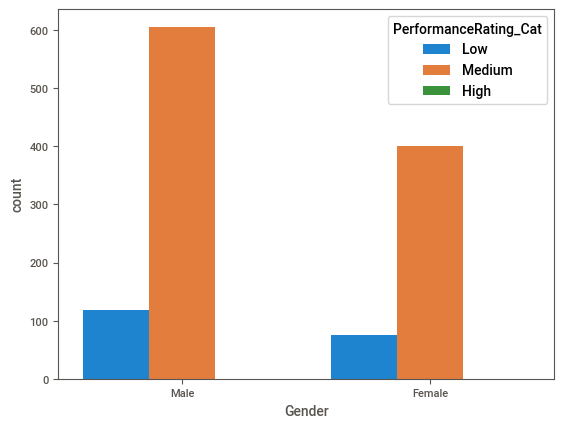

In [22]:
sns.countplot(x=df[i], hue=df['PerformanceRating_Cat'])

In [15]:
cat_col = df.select_dtypes (include=['object'])
cat_col.columns

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

In [16]:
cat_col

EmpNumber  Gender EducationBackground MaritalStatus    EmpDepartment  \
0     E1001000    Male           Marketing        Single            Sales   
1     E1001006    Male           Marketing        Single            Sales   
2     E1001007    Male       Life Sciences       Married            Sales   
3     E1001009    Male     Human Resources      Divorced  Human Resources   
4     E1001010    Male           Marketing        Single            Sales   
...        ...     ...                 ...           ...              ...   
1195   E100992  Female             Medical      Divorced            Sales   
1196   E100993    Male       Life Sciences        Single      Development   
1197   E100994    Male             Medical       Married      Development   
1198   E100995  Female             Medical        Single     Data Science   
1199   E100998  Female       Life Sciences        Single            Sales   

            EmpJobRole BusinessTravelFrequency OverTime Attrition  
0      Sales Executive           Travel_Rarely       No        No  
1      Sales Executive           Travel_Rarely       No        No  
2      Sales Executive       Travel_Frequently      Yes        No  
3              Manager           Travel_Rarely       No        No  
4      Sales Executive           Travel_Rarely       No        No  
...                ...                     ...      ...       ...  
1195   Sales Executive       Travel_Frequently      Yes        No  
1196  Senior Developer           Travel_Rarely       No        No  
1197  Senior Developer           Travel_Rarely      Yes        No  
1198    Data Scientist           Travel_Rarely       No        No  
1199   Sales Executive           Travel_Rarely       No       Yes  

[1200 rows x 9 columns]

In [17]:
for i in cat_col.drop('EmpNumber', axis=1):
    print(i, df[i].unique())
    print('************************')
    print(df[i].value_counts())
    print('-------------------------------')

Gender ['Male' 'Female']
************************
Gender
Male      725
Female    475
Name: count, dtype: int64
-------------------------------
EducationBackground ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
************************
EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64
-------------------------------
MaritalStatus ['Single' 'Married' 'Divorced']
************************
MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64
-------------------------------
EmpDepartment ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
************************
EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science     

* Multivariate analysis


<Figure size 1600x1200 with 0 Axes>

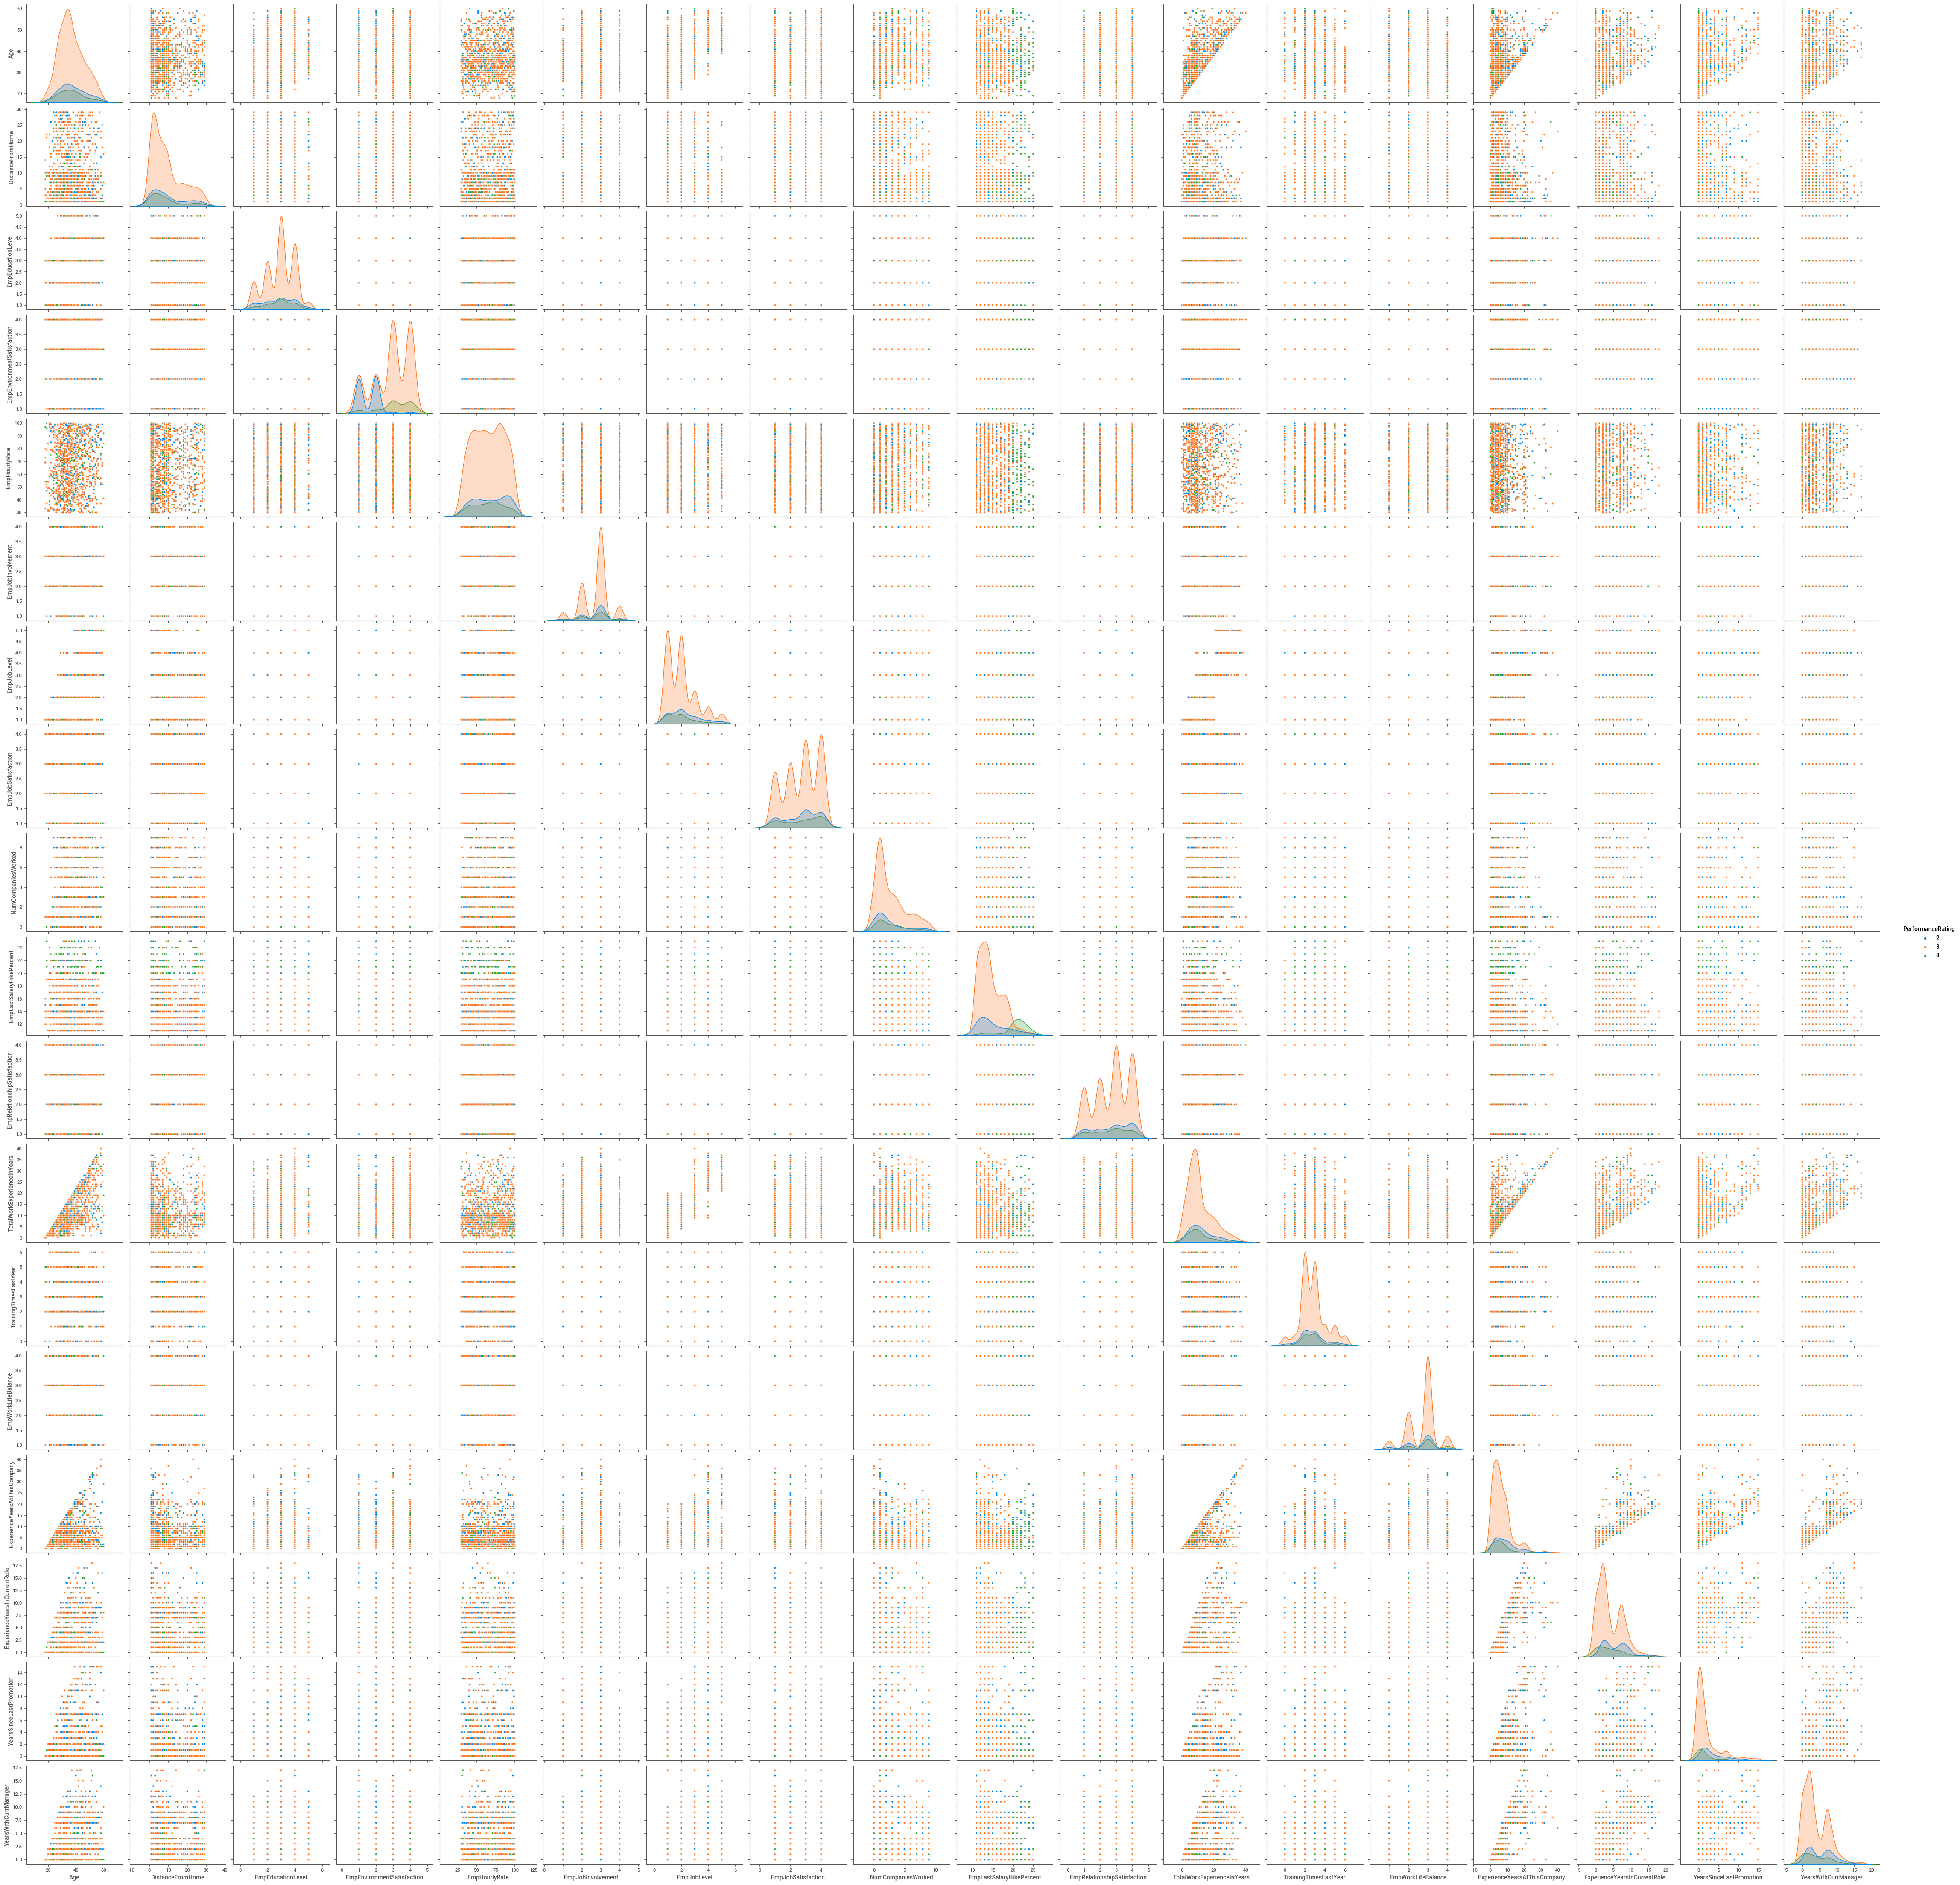

In [25]:
plt.figure(figsize=(16, 12))  # Adjust the figure size

sns.pairplot(df,hue= 'PerformanceRating')

In [ ]:
CONVERT CATEGORICAL TO NUMERICAL

In [ ]:
cat_col.columns

###### Techniques Used:
* ###### Manual Encoding:
Manual encoding is an effective technique to handle categorical features by using the map function. In this approach, we manually map category labels to numerical values, typically based on their frequency or importance in the dataset. This method allows for fine control over how categorical variables are translated into numeric representations.

* ###### Frequency Encoding:
Frequency encoding transforms a categorical variable into a numerical one by leveraging the frequency (or count) of each category. This technique assigns values based on how often each category appears in the dataset. It’s a useful method when the occurrence of categories can be a meaningful signal for modeling.



1.Gender

In [ ]:
# Use mannual encoding to map the labels
df.Gender = df.Gender.map({'Male':1,'Female':0}) # Map male with 1 and female with 0

In [ ]:
# Get value counts of gender
df.Gender.value_counts()

2.Education Background

In [ ]:
# Use frequency encoding
df.loc[df['EducationBackground']=='Life Sciences','EducationBackground']=5
df.loc[df['EducationBackground']=='Medical','EducationBackground']=4
df.loc[df['EducationBackground']=='Marketing','EducationBackground']=3
df.loc[df['EducationBackground']=='Technical Degree','EducationBackground']=2
df.loc[df['EducationBackground']=='Other','EducationBackground']=1
df.loc[df['EducationBackground']=='Human Resources','EducationBackground']=0

In [ ]:
# Checking conversion happen or not
df.EducationBackground.value_counts()

In [ ]:
3.Marital Status

In [ ]:
# Use mannual encoding
df.MaritalStatus = df.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [ ]:
# Check conversion happen or not
df.MaritalStatus.value_counts()

In [ ]:
4.Employee Department

In [ ]:
# Use Frequency encoding
df.loc[df['EmpDepartment']=='Sales','EmpDepartment']=5
df.loc[df['EmpDepartment']=='Development','EmpDepartment']=4
df.loc[df['EmpDepartment']=='Research & Development','EmpDepartment']=3
df.loc[df['EmpDepartment']=='Human Resources','EmpDepartment']=2
df.loc[df['EmpDepartment']=='Finance','EmpDepartment']=1
df.loc[df['EmpDepartment']=='Data Science','EmpDepartment']=0

In [ ]:
# Check conversion happen or not
df.EmpDepartment.value_counts()

In [ ]:
5.Employee Job Role

In [ ]:
# Use frequency encoding because feature contain a lots of label
df.loc[df['EmpJobRole']=='Sales Executive','EmpJobRole']=18
df.loc[df['EmpJobRole']=='Developer','EmpJobRole']=17
df.loc[df['EmpJobRole']=='Manager R&D','EmpJobRole']=16
df.loc[df['EmpJobRole']=='Research Scientist','EmpJobRole']=15
df.loc[df['EmpJobRole']=='Sales Representative','EmpJobRole']=14
df.loc[df['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
df.loc[df['EmpJobRole']=='Senior Developer','EmpJobRole']=12
df.loc[df['EmpJobRole']=='Manager','EmpJobRole']=11
df.loc[df['EmpJobRole']=='Finance Manager','EmpJobRole']=10
df.loc[df['EmpJobRole']=='Human Resources','EmpJobRole']=9
df.loc[df['EmpJobRole']=='Technical Lead','EmpJobRole']=8
df.loc[df['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
df.loc[df['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
df.loc[df['EmpJobRole']=='Data Scientist','EmpJobRole']=5
df.loc[df['EmpJobRole']=='Research Director','EmpJobRole']=4
df.loc[df['EmpJobRole']=='Business Analyst','EmpJobRole']=3
df.loc[df['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
df.loc[df['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
df.loc[df['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [ ]:
# Getting the value counts of EmpJobRole
df.EmpJobRole.value_counts()

In [ ]:
6.Business Travel Frequency

In [ ]:
# Use mannual encoding Because feature contain minimum label
df.BusinessTravelFrequency = df.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

In [ ]:
# Check conversion happen or not
df.BusinessTravelFrequency.value_counts()

In [ ]:
7.Overtime

In [ ]:
# Use mannual Encoding
df.OverTime = df.OverTime.map({'No':1,'Yes':0})

In [ ]:
# Check conversion happen or not
df.OverTime.value_counts()

In [ ]:
8.Attrition

In [ ]:
# Use Mannual encoding because feature contain less no of label
df.Attrition = df.Attrition.map({'No':1,'Yes':0})

In [ ]:
# Check conversion happen or not
df.Attrition.value_counts()

In [ ]:
# Check all data features 
df.head(3)

In [ ]:
CHECK OUTLIERS AND IMPUTE OUTLIERS

Box plots visually represent the distribution of numerical data by showing the data's central tendency, spread, and variability. Additionally, they highlight any potential outliers by marking points that fall significantly outside the main data range.

In [ ]:
output = df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in output: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(output[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

In [ ]:
df.columns

##### IQR (Interquartile Range): 
The IQR is a measure of statistical dispersion and is used when data contains outliers or extreme values. Instead of relying on the mean, which can be skewed by these outliers, we use the median to summarize the central tendency. The IQR represents the range between the first quartile (25th percentile) and the third quartile (75th percentile), providing a clearer view of the spread of the middle 50% of the data.

In [ ]:
1.Total Work Experiance in year

In [ ]:
#find Q1 and Q3

Q1= df['TotalWorkExperienceInYears'].quantile(0.25)
print('Lower quantile',Q1)
Q3 = df['TotalWorkExperienceInYears'].quantile(0.75)
print('Upper quantile',Q3)

#calculate IQR
IQR= Q3-Q1
IQR

In [ ]:
# Get maximum and minimum limit
min_limit = Q1 - 1.5*IQR
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*IQR
print("Maximum Limit:",max_limit)

In [ ]:
# Find the records which are greater than upper limit and lower limit
df.loc[df['TotalWorkExperienceInYears']> max_limit]

In [ ]:
df.loc[df['TotalWorkExperienceInYears']> min_limit]

In [ ]:
# Impute outlier
df.loc[df['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=df['TotalWorkExperienceInYears'].median()

In [ ]:
# filtering data after imputation
df.loc[df['TotalWorkExperienceInYears'] > max_limit]

In [ ]:
2.Training Times Last Year

In [ ]:
#find Q1 and Q3

Q1= df['TrainingTimesLastYear'].quantile(0.25)
print('Lower quantile',Q1)
Q3 = df['TrainingTimesLastYear'].quantile(0.75)
print('Upper quantile',Q3)

#calculate IQR
IQR= Q3-Q1
print("IQR", IQR)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*IQR
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*IQR
print("Maximum Limit:",max_limit)

In [ ]:
# Impute outlier in max & minmum limit
df.loc[df['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=df['TrainingTimesLastYear'].median()
df.loc[df['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=df['TrainingTimesLastYear'].median()

In [ ]:
# Filtering the min limit
df.loc[df['TrainingTimesLastYear'] < min_limit]

In [ ]:
# Filtering the max limit
df.loc[df['TrainingTimesLastYear'] > max_limit]

In [ ]:
3.Experience Years At This Company

In [ ]:
#find Q1 and Q3

Q1= df['ExperienceYearsAtThisCompany'].quantile(0.25)
print('Lower quantile',Q1)
Q3 = df['ExperienceYearsAtThisCompany'].quantile(0.75)
print('Upper quantile',Q3)

#calculate IQR
IQR= Q3-Q1
print("IQR", IQR)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*IQR
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*IQR
print("Maximum Limit:",max_limit)

In [ ]:
# Impute outlier
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=df['ExperienceYearsAtThisCompany'].median()

In [ ]:
# Filtering the data
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit]

In [ ]:
4.Experience Years In Current Role

In [ ]:
#find Q1 and Q3

Q1= df['ExperienceYearsInCurrentRole'].quantile(0.25)
print('Lower quantile',Q1)
Q3 = df['ExperienceYearsInCurrentRole'].quantile(0.75)
print('Upper quantile',Q3)

#calculate IQR
IQR= Q3-Q1
print("IQR", IQR)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*IQR
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*IQR
print("Maximum Limit:",max_limit)

In [ ]:
# Impute the outlier
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = df['ExperienceYearsInCurrentRole'].median()

In [ ]:
# Filtering the data
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit]

In [ ]:
5.Years Since Last Promotion

In [ ]:
#find Q1 and Q3

Q1= df['YearsSinceLastPromotion'].quantile(0.25)
print('Lower quantile',Q1)
Q3 = df['YearsSinceLastPromotion'].quantile(0.75)
print('Upper quantile',Q3)

#calculate IQR
IQR= Q3-Q1
print("IQR", IQR)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*IQR
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*IQR
print("Maximum Limit:",max_limit)

In [ ]:
# impute outlier
df.loc[df['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=df['YearsSinceLastPromotion'].median()

In [ ]:
# Filtering data
df.loc[df['YearsSinceLastPromotion'] > max_limit]

In [ ]:
6.Years With Current Manager

In [ ]:
#find Q1 and Q3

Q1= df['YearsWithCurrManager'].quantile(0.25)
print('Lower quantile',Q1)
Q3 = df['YearsWithCurrManager'].quantile(0.75)
print('Upper quantile',Q3)

#calculate IQR
IQR= Q3-Q1
print("IQR", IQR)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*IQR
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*IQR
print("Maximum Limit:",max_limit)

In [ ]:
# impute outlier
df.loc[df['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=df['YearsWithCurrManager'].median()

In [ ]:
# Filtering the data
df.loc[df['YearsWithCurrManager'] >max_limit]

In [ ]:
CHECKING OUTLIER AFTER IMPUTATION

In [ ]:
output = df[['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10)) # defining canvas size
plotno = 1 # counter

for column in output: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(2,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(output[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

###### Observation: 
Outliers have been successfully handled for most features, but certain feature box plots still display outliers. In these cases, the outliers cannot be imputed effectively.

In [ ]:
FEATURE TRANSFORMATION

From the previous EDA, we observed that the YearSinceLastPromotion feature exhibits skewness in the data. To address this, we'll apply a square root transformation to reduce the skewness.

###### Q-Q Plot: 
A Q–Q plot, or quantile-quantile plot, is a graphical tool used to compare two probability distributions by plotting their quantiles against each other. It helps in assessing whether a dataset follows a particular distribution, such as normality.

In [ ]:
pip install scipy matplotlib

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats  # Import stats from scipy
import pylab  # Import pylab for Q-Q plot

# Function to plot both histogram and Q-Q plot for a given feature
def plot_data(df, feature):
    plt.figure(figsize=(10, 5))
    
    # Plot histogram
    plt.subplot(1, 2, 1)
    df[feature].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    
    # Plot Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist='norm', plot=pylab)
    plt.title(f'Q-Q Plot of {feature}')
    
    # Ensure plots don't overlap and display them
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_data(df, 'YearsSinceLastPromotion')


In [ ]:
plot_data(df, 'YearsSinceLastPromotion')

In [ ]:
SQUARE ROOT TRANSFORMATION

In [ ]:
df['square_YearsSinceLastPromotion'] = df.YearsSinceLastPromotion**(1/2)

In [ ]:
plot_data(df,'square_YearsSinceLastPromotion')

###### Now some points are close to the line.

SCALING THE DATA

* Standard Scaling:
  
Standardization involves scaling features so that they have a mean of 0 and a standard deviation of 1. It assumes that the feature follows a normal distribution, and adjusts the data by centering it around the mean and scaling it based on the standard deviation, ensuring that each feature has comparable influence.

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  #Create Object

df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'square_YearsSinceLastPromotion']]=scalar.fit_transform(df[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','square_YearsSinceLastPromotion']])

In [ ]:
df.head()

# 4. Feature Selection/Engineering
* Identify the most important features using correlation and other feature selection techniques.
* Apply necessary transformations like encoding categorical variables.

* DROP UNIQUE AND CONTANT FEATURES

We will drop the Employee Number column, as it is a constant and doesn't provide any meaningful variation. Additionally, the Years Since Last Promotion column will be removed since we have created a new feature by applying the square root transformation to this data.

In [ ]:
df.drop(['EmpNumber','YearsSinceLastPromotion'],axis=1,inplace=True)

##### CHECKING CORELATION
* Heatmap: 

A heatmap is a visual representation of data where varying intensities of color are used to depict different values, making it easy to identify patterns, correlations, and trends across the dataset.

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')
plt.show()

From the heatmap above, it is evident that there are no highly correlated features in the dataset. To confirm this, we can utilize a straightforward code snippet.

In [ ]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

We have now verified that there are no highly correlated features present in the dataset.

In [ ]:
CHECKING DUPLICATES

In [ ]:
df.duplicated().sum()

Their is no Duplicates is present in data.

##### Principal Component Analysis (PCA) 
is a widely used method for handling large datasets with numerous features per observation. It simplifies the data, making it more interpretable while retaining as much information as possible. PCA is particularly useful for reducing dimensionality by transforming the original features into a smaller set of important components.

###### Use case: 
When a dataset has more than 25 features, PCA helps by eliminating noise, focusing on the most significant features, reducing the risk of overfitting, and ultimately improving the model's performance.

In [ ]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(df)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

Observation: After dropping the unique and constant columns, the dataset now contains 27 features. Based on the PCA results, 25 features show minimal variance loss, so we will proceed by selecting these 25 features.

In [ ]:
# Selecting the components
pca = PCA(n_components=25)
new_data = pca.fit_transform(df)
new_data

In [ ]:
CREATE NEW DATA FRAME

In [ ]:
principle_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25'])

# Add target veriable to preprocess dataframe for model building & evaluation
principle_df['PerformanceRating']=df.PerformanceRating

principle_df.head()

In [ ]:
Observation: Data is contain total 27 feature after dropping unique and constant column,from above PCA it shows the 25 feature has less varaince loss, so we are going to select 25 feature.

In [ ]:
SAVE PRE-PROCESS DATA

In [ ]:
principle_df.to_csv('employee_performance_preprocessed_data.csv')

# Reading new preprocess csv file
df = pd.read_csv('employee_performance_preprocessed_data.csv')

# Get first five rows 
df.head()

In [ ]:
LOADING PREPROCESS DATA

In [ ]:
data = pd.read_csv('employee_performance_preprocessed_data.csv')
pd.set_option('display.max_columns',None) # Used to display the all features
data.drop('Unnamed: 0',axis=1,inplace=True) # Drop unwanted feature
data.head()

In [ ]:
DEFINE INDEPENDANT & DEPENDANT FEATURES

In [ ]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
BALANCING THE TARGET FEATURE

* SMOTE (Synthetic Minority Oversampling Technique)
  
is a widely used method to address class imbalance in datasets. It works by generating synthetic examples for the minority class, rather than simply duplicating existing instances. SMOTE creates new instances by interpolating between existing minority class samples, helping to balance the class distribution.

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

In [ ]:
Now target feature in balance

In [ ]:
SPLIT TRAINING AND TESTING DATA

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=42,test_size=0.20) # 20% data given to testing

In [ ]:
# Check shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

## 5. MODEL CREATION, PREDICTION AND EVALUATION

Create a sweet spot model (Low bias, Low variance)

In this section, we will experiment with three different algorithms:

* Support Vector Machine (SVM)
* Random Forest
* Artificial Neural Network (MLP Classifier)


1. Support Vector Machine

In [ ]:
# importing library
from sklearn.svm import SVC

# Object Creaation
svc = SVC()

# Fitting training and testing data
svc.fit(X_train,y_train)

# Prediction on train data
svc_train_predict = svc.predict(X_train)

# Prediction on test data
svc_test_predict = svc.predict(X_test)

In [ ]:
TRAINING ACCURACY

In [ ]:
# import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of support vector classifier model",svc_train_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_train_predict,y_train))

* Support vector classifier perform well on training data

In [ ]:
TESTING ACCURACY

In [ ]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("Prcision Score:", precision_score(svc_test_predict, y_test, average='weighted')*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
pd.crosstab(svc_test_predict,y_test)

2. Random Forest

In [ ]:
# importing libary and creating object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# fitting training data
rf.fit(X_train,y_train)

# Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Prediction on training data
rf_train_predict = rf.predict(X_train)

In [ ]:
TRANING ACCURACY

In [ ]:
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

The Random Forest classifier performs well on the training data.

In [ ]:
TESTING ACCURACY

In [ ]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Precision Score:", precision_score(rf_test_predict, y_test, average='weighted')*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

HYPER PARAMETER TUNNING WITH RANDOMIZED SEARCH CV

In [ ]:
# import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  
#In random forest we are not used grid search CV because of memory reason.

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['sqrt','log2',None] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,8] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4]  #Min number of data point allowed in leaf node

# Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Object creation
rf_clf = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

# Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='f1',param_distributions=random_grid,
                           n_iter=10,cv=2,verbose=2,random_state=1,n_jobs=-1)

# Fitting the training data
rf_cv.fit(X_train,y_train)

# Get best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")

In [ ]:
# Create object and place the best paramter
rf_clf1 = RandomForestClassifier(**rf_best_params)

# Fitting the training data
rf_clf1.fit(X_train,y_train)

# Prediction on test data
rf_clf1_predict = rf_clf1.predict(X_test)

In [ ]:
TEST ACCURACY AFTER HYPER-PARAMETER TUNNING

In [ ]:
rf_accuracy = accuracy_score(rf_clf1_predict,y_test)
print("Accuracy after hyperparameter tunning",rf_accuracy*100)
print("Classification report: \n",classification_report(rf_clf1_predict,y_test))

After hyperparameter tuning, the score decreased.

In [ ]:
pd.crosstab(rf_clf1_predict,y_test)

3.Artificial Neural Network [MLP Classifier]

In [ ]:
# Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)

In [ ]:
# Fitting the training data
model.fit(X_train,y_train)

In [ ]:
# Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

In [ ]:
# Prediction on test data
mlp_test_predict = model.predict(X_test)

# Prediction on training data
mlp_train_predict = model.predict(X_train)

In [ ]:
TRAINING ACCURACY

In [ ]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

* Multilayer percepton Perform well on training data.

In [ ]:
TESTING ACCURACY

In [ ]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Precision Score:",precision_score(mlp_test_predict, y_test, average='weighted')*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

In [ ]:
* Multilayer percepton perform well on testing data

In [ ]:
CONFUSION MATRIX

In [ ]:
pd.crosstab(mlp_test_predict,y_test)

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['SVM', 'Random Forest', 'ANN']

# Training accuracies
training_accuracies = [96.70, 100, 99.42]

# Testing accuracies
testing_accuracies = [95.23, 95.04, 95.61]

# Plotting
plt.figure(figsize=(10, 6))

# Plot training accuracies
plt.plot(models, training_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')

# Plot testing accuracies
plt.plot(models, testing_accuracies, marker='o', linestyle='-', color='r', label='Testing Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy of Different Models')
plt.ylim(90, 105)  # Setting y-axis limit
plt.legend()
plt.grid(True)  # Add grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#### Conclusion:

1. Support Vector Machine:

Training Accuracy: 96.9%

Testing Accuracy: 95.0%

2. Random Forest:

Training Accuracy: 100%

Testing Accuracy: 94.1% (performance dropped after hyperparameter tuning)

3. Artificial Neural Network (Multilayer Perceptron):

Training Accuracy: 99.0%

Testing Accuracy: 95.0%

Precision Score: 95.5%


Among the models, the Artificial Neural Network (MLP) stands out, demonstrating strong performance in both the training and testing phases. With a training accuracy of 99.0%, testing accuracy of 95.0%, and a precision score of 95.5%, this model provides a great balance between high accuracy and generalization, making it the best candidate for the "sweet spot" model.

In [ ]:
# saving model with the help of pickle
import pickle

file = open('mlp_classifier_model.pkl','wb')
pickle.dump(model,file)